In [6]:
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd
import matplotlib as plt
import seaborn as sns
import seaborn.objects as so
import dataframe_image as di

In [7]:
#di.export(vendas_por_tempo,"tempo.xlsx",max_cols=-1,max_rows=-1)
#vendas_semanal.to_csv('vendas_semanal.csv', index=False)

# Proyecto de Analisis Exploratoria

## Base de Datos

In [10]:
df = pd.read_excel("DataModelPizzaSales.xlsx")
df.head()

order_details_id  order_id       pizza_id  quantity order_date order_time  \
0                 1         1     hawaiian_m         1 2015-01-01   11:38:36   
1                 2         2  classic_dlx_m         1 2015-01-01   11:57:40   
2                 3         2  five_cheese_l         1 2015-01-01   11:57:40   
3                 4         2    ital_supr_l         1 2015-01-01   11:57:40   
4                 5         2     mexicana_m         1 2015-01-01   11:57:40   

   unit_price  total_price pizza_size pizza_category  \
0       13.25        13.25          M        Classic   
1       16.00        16.00          M        Classic   
2       18.50        18.50          L         Veggie   
3       20.75        20.75          L        Supreme   
4       16.00        16.00          M         Veggie   

                                   pizza_ingredients  \
0           Sliced Ham, Pineapple, Mozzarella Cheese   
1  Pepperoni, Mushrooms, Red Onions, Red Peppers,...   
2  Mozzarella Cheese, Provolone Cheese, Smoked Go...   
3  Calabrese Salami, Capocollo, Tomatoes, Red Oni...   
4  Tomatoes, Red Peppers, Jalapeno Peppers, Red O...   

                  pizza_name  
0         The Hawaiian Pizza  
1   The Classic Deluxe Pizza  
2      The Five Cheese Pizza  
3  The Italian Supreme Pizza  
4         The Mexicana Pizza

### Eliminacion de colunas innecesarias

In [12]:
del df ['pizza_id']
del df ['order_id']
del df ['order_details_id']
display(df)

quantity order_date order_time  unit_price  total_price pizza_size  \
0             1 2015-01-01   11:38:36       13.25        13.25          M   
1             1 2015-01-01   11:57:40       16.00        16.00          M   
2             1 2015-01-01   11:57:40       18.50        18.50          L   
3             1 2015-01-01   11:57:40       20.75        20.75          L   
4             1 2015-01-01   11:57:40       16.00        16.00          M   
...         ...        ...        ...         ...          ...        ...   
48615         1 2015-12-31   21:23:10       16.75        16.75          M   
48616         1 2015-12-31   21:23:10       17.95        17.95          L   
48617         1 2015-12-31   21:23:10       12.00        12.00          S   
48618         1 2015-12-31   22:09:54       20.25        20.25          L   
48619         1 2015-12-31   23:02:05       12.75        12.75          S   

      pizza_category                                  pizza_ingredients  \
0            Classic           Sliced Ham, Pineapple, Mozzarella Cheese   
1            Classic  Pepperoni, Mushrooms, Red Onions, Red Peppers,...   
2             Veggie  Mozzarella Cheese, Provolone Cheese, Smoked Go...   
3            Supreme  Calabrese Salami, Capocollo, Tomatoes, Red Oni...   
4             Veggie  Tomatoes, Red Peppers, Jalapeno Peppers, Red O...   
...              ...                                                ...   
48615        Chicken  Chicken, Red Onions, Red Peppers, Mushrooms, A...   
48616         Veggie  Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...   
48617        Classic  Tomatoes, Anchovies, Green Olives, Red Onions,...   
48618         Veggie  Tomatoes, Red Peppers, Jalapeno Peppers, Red O...   
48619        Chicken  Barbecued Chicken, Red Peppers, Green Peppers,...   

                       pizza_name  
0              The Hawaiian Pizza  
1        The Classic Deluxe Pizza  
2           The Five Cheese Pizza  
3       The Italian Supreme Pizza  
4              The Mexicana Pizza  
...                           ...  
48615   The Chicken Alfredo Pizza  
48616       The Four Cheese Pizza  
48617        The Napolitana Pizza  
48618          The Mexicana Pizza  
48619  The Barbecue Chicken Pizza  

[48620 rows x 9 columns]

## Informe sobre Valores e Espacios Vacios

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   quantity           48620 non-null  int64         
 1   order_date         48620 non-null  datetime64[ns]
 2   order_time         48620 non-null  object        
 3   unit_price         48620 non-null  float64       
 4   total_price        48620 non-null  float64       
 5   pizza_size         48620 non-null  object        
 6   pizza_category     48620 non-null  object        
 7   pizza_ingredients  48620 non-null  object        
 8   pizza_name         48620 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 3.3+ MB


Filas (**RangeIndex**): 48,620 registros (de 0 a 48,619). Cada fila representa un pedido de pizza.

Columnas (**Data columns**): 9 columnas.

Descripción de las columnas:

**quantity:** Cantidad de pizzas pedidas.

**order_date:** Fecha del pedido.

**order_time:** Hora del pedido.

**unit_price:** Precio unitario de cada pizza.

**total_price:** Valor total del pedido.

**pizza_size:** Tamaño de la pizza (por ejemplo: pequeña, mediana, grande).

**pizza_category:** Tipo de pizza (por ejemplo: Margarita, Pepperoni).

**pizza_ingredients:** Ingredientes de la pizza.

**pizza_name:** Nombre de la pizza.

## Informe General Simple

In [17]:
df.describe()

quantity                     order_date    unit_price   total_price
count  48620.000000                          48620  48620.000000  48620.000000
mean       1.019622  2015-06-29 11:03:43.611682560     16.494132     16.821474
min        1.000000            2015-01-01 00:00:00      9.750000      9.750000
25%        1.000000            2015-03-31 00:00:00     12.750000     12.750000
50%        1.000000            2015-06-28 00:00:00     16.500000     16.500000
75%        1.000000            2015-09-28 00:00:00     20.250000     20.500000
max        4.000000            2015-12-31 00:00:00     35.950000     83.000000
std        0.143077                            NaN      3.621789      4.437398

### Análisis del resumen estadístico
**1. quantity (cantidad de pizzas):**

Promedio (mean): La mayoría de los pedidos incluyen solo 1 pizza, con un promedio de 1,02.

**Mínimo (min):** El pedido más pequeño tiene 1 pizza.

**Máximo (max):** El pedido más grande tiene 4 pizzas.

**Desviación estándar (std):** 
Baja variación en las cantidades (0,14), lo que indica que los pedidos con más de 1 pizza son poco comunes.

**2. order_date (fecha del pedido):**
Los pedidos cubren desde 2015-01-01 hasta 2015-12-31, representando todo el año.

La mediana (50%) ocurre el 2015-06-28, lo que muestra una distribución uniforme de los pedidos a lo largo del tiempo.

**3. unit_price (precio unitario de cada pizza):**

**Promedio (mean):**
El precio promedio por pizza es 16,49.

**Rango intercuartílico (IQR):**

25% de las pizzas cuestan hasta 12,75.

50% (mediana) cuestan 16,50.

75% cuestan hasta 20,25.

**Máximo (max):** La pizza más cara cuesta 35,95.

**Desviación estándar (std):** 
Hay una variación moderada en los precios (3,62).

**4. total_price (valor total del pedido):**

**Promedio (mean):** 
El valor promedio de un pedido es 16,82, lo que confirma que la mayoría de los pedidos incluyen solo una pizza.

**Máximo (max):** 
El pedido más costoso tiene un valor total de 83,00, indicando que pedidos más grandes o pizzas más caras son poco comunes.

**Desviación estándar (std):**
El total varía más que el precio unitario (4,44), debido a la influencia de pedidos de mayor cantidad o precios altos.

**Conclusiones iniciales**

Predominan los pedidos individuales (cantidad promedio ≈ 1).

Precios consistentes: La mayoría de los precios están entre 12,75 y 20,25.

Pedidos altos son raros: Solo unos pocos alcanzan el máximo de 83,00.

Los datos cubren todo el año 2015, ideales para análisis de tendencias estacionales.

In [19]:
informe_general = df.agg({"quantity":["max","min","mean","sum"],"unit_price":["max","min","mean"],"total_price":["max","min","mean","sum"]}).reset_index()
display(informe_general)

index      quantity  unit_price    total_price
0   max      4.000000   35.950000      83.000000
1   min      1.000000    9.750000       9.750000
2  mean      1.019622   16.494132      16.821474
3   sum  49574.000000         NaN  817860.050000

## Cantidad de Sabores de Pizza

In [21]:
df["pizza_name"].unique()

array(['The Hawaiian Pizza', 'The Classic Deluxe Pizza',
       'The Five Cheese Pizza', 'The Italian Supreme Pizza',
       'The Mexicana Pizza', 'The Thai Chicken Pizza',
       'The Prosciutto and Arugula Pizza', 'The Barbecue Chicken Pizza',
       'The Greek Pizza', 'The Spinach Supreme Pizza',
       'The Green Garden Pizza', 'The Italian Capocollo Pizza',
       'The Spicy Italian Pizza', 'The Spinach Pesto Pizza',
       'The Vegetables + Vegetables Pizza', 'The Southwest Chicken Pizza',
       'The California Chicken Pizza', 'The Pepperoni Pizza',
       'The Chicken Pesto Pizza', 'The Big Meat Pizza',
       'The Soppressata Pizza', 'The Four Cheese Pizza',
       'The Napolitana Pizza', 'The Calabrese Pizza',
       'The Italian Vegetables Pizza', 'The Mediterranean Pizza',
       'The Pepper Salami Pizza', 'The Spinach and Feta Pizza',
       'The Sicilian Pizza', 'The Chicken Alfredo Pizza',
       'The Pepperoni, Mushroom, and Peppers Pizza',
       'The Brie Carre Pizza'

## Desajuste entre Popularidad y Rentabilidad

### Lista de pizzas mas Rentables 

In [24]:
df_grupo = df.groupby(["pizza_name"]).sum(numeric_only=True).sort_values("total_price",ascending=False).reset_index()
display(df_grupo)

pizza_name  quantity  unit_price  \
0                       The Thai Chicken Pizza      2371    42332.25   
1                   The Barbecue Chicken Pizza      2432    41683.00   
2                 The California Chicken Pizza      2370    40166.50   
3                     The Classic Deluxe Pizza      2453    37631.50   
4                      The Spicy Italian Pizza      1924    34163.50   
5                  The Southwest Chicken Pizza      1917    34081.75   
6                    The Italian Supreme Pizza      1884    32856.25   
7                           The Hawaiian Pizza      2422    31561.75   
8                        The Four Cheese Pizza      1902    31361.10   
9                           The Sicilian Pizza      1938    30123.75   
10                         The Pepperoni Pizza      2418    29538.25   
11                             The Greek Pizza      1420    28170.10   
12                          The Mexicana Pizza      1484    26243.00   
13                       The Five Cheese Pizza      1409    25141.50   
14                     The Pepper Salami Pizza      1446    25081.00   
15                 The Italian Capocollo Pizza      1438    24641.50   
16           The Vegetables + Vegetables Pizza      1526    24129.75   
17            The Prosciutto and Arugula Pizza      1457    23679.75   
18                        The Napolitana Pizza      1464    23850.50   
19                  The Spinach and Feta Pizza      1446    23021.25   
20                          The Big Meat Pizza      1914    21732.00   
21  The Pepperoni, Mushroom, and Peppers Pizza      1359    18607.00   
22                   The Chicken Alfredo Pizza       987    16779.00   
23                     The Chicken Pesto Pizza       973    16484.75   
24                       The Soppressata Pizza       961    16342.75   
25                The Italian Vegetables Pizza       981    15930.75   
26                         The Calabrese Pizza       937    15763.75   
27                     The Spinach Pesto Pizza       970    15388.25   
28                     The Mediterranean Pizza       934    15163.00   
29                   The Spinach Supreme Pizza       950    15124.00   
30                      The Green Garden Pizza       997    13819.50   
31                        The Brie Carre Pizza       490    11352.00   

    total_price  
0      43434.25  
1      42768.00  
2      41409.50  
3      38180.50  
4      34831.25  
5      34705.75  
6      33476.75  
7      32273.25  
8      32265.70  
9      30940.50  
10     30161.75  
11     28454.10  
12     26780.75  
13     26066.50  
14     25529.00  
15     25094.00  
16     24374.75  
17     24193.25  
18     24087.00  
19     23271.25  
20     22968.00  
21     18834.50  
22     16900.25  
23     16701.75  
24     16425.75  
25     16019.25  
26     15934.25  
27     15596.00  
28     15360.50  
29     15277.75  
30     13955.75  
31     11588.50

### Lista de Pizzas mas Vendidas

In [26]:
df_grupo2 = df.groupby(["pizza_name"]).sum(numeric_only=True).sort_values("quantity",ascending=False).reset_index()
display(df_grupo2)

pizza_name  quantity  unit_price  \
0                     The Classic Deluxe Pizza      2453    37631.50   
1                   The Barbecue Chicken Pizza      2432    41683.00   
2                           The Hawaiian Pizza      2422    31561.75   
3                          The Pepperoni Pizza      2418    29538.25   
4                       The Thai Chicken Pizza      2371    42332.25   
5                 The California Chicken Pizza      2370    40166.50   
6                           The Sicilian Pizza      1938    30123.75   
7                      The Spicy Italian Pizza      1924    34163.50   
8                  The Southwest Chicken Pizza      1917    34081.75   
9                           The Big Meat Pizza      1914    21732.00   
10                       The Four Cheese Pizza      1902    31361.10   
11                   The Italian Supreme Pizza      1884    32856.25   
12           The Vegetables + Vegetables Pizza      1526    24129.75   
13                          The Mexicana Pizza      1484    26243.00   
14                        The Napolitana Pizza      1464    23850.50   
15            The Prosciutto and Arugula Pizza      1457    23679.75   
16                  The Spinach and Feta Pizza      1446    23021.25   
17                     The Pepper Salami Pizza      1446    25081.00   
18                 The Italian Capocollo Pizza      1438    24641.50   
19                             The Greek Pizza      1420    28170.10   
20                       The Five Cheese Pizza      1409    25141.50   
21  The Pepperoni, Mushroom, and Peppers Pizza      1359    18607.00   
22                      The Green Garden Pizza       997    13819.50   
23                   The Chicken Alfredo Pizza       987    16779.00   
24                The Italian Vegetables Pizza       981    15930.75   
25                     The Chicken Pesto Pizza       973    16484.75   
26                     The Spinach Pesto Pizza       970    15388.25   
27                       The Soppressata Pizza       961    16342.75   
28                   The Spinach Supreme Pizza       950    15124.00   
29                         The Calabrese Pizza       937    15763.75   
30                     The Mediterranean Pizza       934    15163.00   
31                        The Brie Carre Pizza       490    11352.00   

    total_price  
0      38180.50  
1      42768.00  
2      32273.25  
3      30161.75  
4      43434.25  
5      41409.50  
6      30940.50  
7      34831.25  
8      34705.75  
9      22968.00  
10     32265.70  
11     33476.75  
12     24374.75  
13     26780.75  
14     24087.00  
15     24193.25  
16     23271.25  
17     25529.00  
18     25094.00  
19     28454.10  
20     26066.50  
21     18834.50  
22     13955.75  
23     16900.25  
24     16019.25  
25     16701.75  
26     15596.00  
27     16425.75  
28     15277.75  
29     15934.25  
30     15360.50  
31     11588.50

### Desajuste entre Popularidad y Rentabilidad

Durante el análisis de las ventas de la pizzería, uno de los principales hallazgos fue que la pizza más vendida no es la que genera más ganancias para la empresa. Este es un punto crucial, ya que sugiere un desajuste entre la demanda de los clientes y la estrategia de precios o el costo de producción de los productos.

**1. Pizza Más Vendida**

La pizza **The Classic Deluxe Pizza** fue la más vendida durante el período analizado, con una cantidad significativa de pedidos. Esto indica que existe una fuerte preferencia por este producto entre los clientes, lo que, en un primer momento, podría sugerir que es un artículo exitoso para el negocio.

**2. Pizza Más Rentable**

Sin embargo, al analizar el margen de ganancia por pizza, observamos que la pizza **The Thai Chicken Pizza**, a pesar de tener un volumen de ventas menor, genera más ganancia debido a su precio de venta más alto. Esto puede ser atribuido a una combinación de factores, como ingredientes más baratos o una estrategia de precios que maximiza la rentabilidad sin afectar significativamente la demanda.

**3. Implicaciones para la Estrategia de Negocio**

Este desajuste tiene implicaciones importantes:

**Precios y Costos de Producción:** Puede ser necesario revisar la estrategia de precios o buscar maneras de reducir el costo de producción de la pizza más vendida. Un análisis más profundo de los costos de cada ingrediente y el tiempo de preparación puede revelar oportunidades para aumentar el margen de ganancia de esta pizza.

**Promociones y Marketing:** Aunque la pizza **The Classic Deluxe Pizza** es la más popular, podría ser interesante enfocar los esfuerzos de marketing para promover la pizza **The Thai Chicken Pizza** (o las otras con mayor rentabilidad), quizás ofreciendo combinaciones, promociones o destacando sus cualidades en los canales de comunicación.

**Revisión del Portafolio de Productos:** La empresa debe evaluar si la variedad de pizzas ofrecidas está equilibrada entre opciones que atraen a los clientes y aquellas que generan márgenes más altos. Se pueden hacer ajustes en el menú para maximizar las ganancias sin sacrificar la satisfacción del cliente.

**4. Recomendaciones**

Análisis Costo-Beneficio: Considerar el costo de producción y la rentabilidad de cada pizza para optimizar el menú.
Promociones Dirigidas: Crear promociones para aumentar las ventas de pizzas más rentables, como combos o descuentos en pizzas específicas.
Segmentación de Clientes: Identificar el perfil de los consumidores que más compran la pizza **The Classic Deluxe Pizza** y entender si sería posible aumentar la venta de las más rentables a ese público.


## Análisis de la Estacionalidad

In [29]:
vendas_ano = df.groupby(["order_date"]).sum(numeric_only=True).reset_index()
display(vendas_ano)

order_date  quantity  unit_price  total_price
0   2015-01-01       162     2697.85      2713.85
1   2015-01-02       165     2643.15      2731.90
2   2015-01-03       158     2596.15      2662.40
3   2015-01-04       106     1755.45      1755.45
4   2015-01-05       125     1994.95      2065.95
..         ...       ...         ...          ...
353 2015-12-27        89     1389.05      1419.00
354 2015-12-28       102     1637.20      1637.20
355 2015-12-29        80     1312.50      1353.25
356 2015-12-30        82     1201.65      1337.80
357 2015-12-31       178     2802.75      2916.00

[358 rows x 4 columns]

<Axes: xlabel='order_date', ylabel='total_price'>

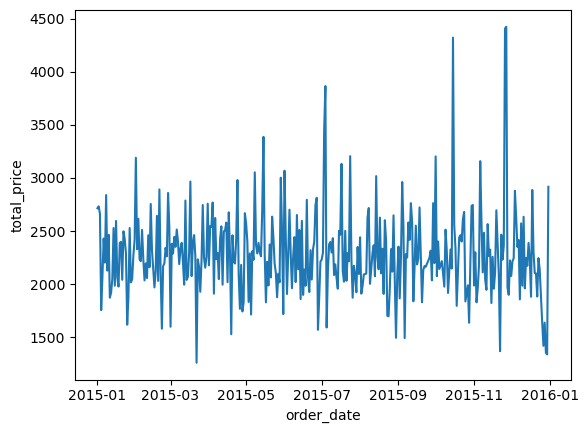

In [92]:
fig1 = px.line(vendas_ano, x="order_date", y="total_price",title="Venta Anual")
fig1.show()
sns.lineplot(data=vendas_ano, x="order_date", y="total_price")

### Patrones generales:

Hay una variación diaria significativa en los valores, con fluctuaciones entre aproximadamente 2000 y 4000 a lo largo del año.

Los picos más altos y más bajos son esporádicos, lo que indica eventos excepcionales de aumento y disminución.

**Tendencias temporales:**

El gráfico muestra varias oscilaciones periódicas, lo que podría indicar estacionalidad o variaciones relacionadas con días laborales frente a fines de semana.

Hay un pico notable alrededor de julio y otro en noviembre, que podrían estar relacionados con campañas estacionales, feriados o promociones.

**Valores atípicos (outliers):**

Algunos valores exceden claramente el rango promedio, como los picos en julio y noviembre.

In [32]:
vendas_por_mes = vendas_ano.resample('ME', on='order_date').sum().reset_index()
display(vendas_por_mes)

order_date  quantity  unit_price  total_price
0  2015-01-31      4232    68472.70     69793.30
1  2015-02-28      3961    64067.40     65159.60
2  2015-03-31      4261    69198.00     70397.10
3  2015-04-30      4151    67286.20     68736.80
4  2015-05-31      4328    69939.35     71402.75
5  2015-06-30      4107    66796.30     68230.20
6  2015-07-31      4392    71027.45     72557.90
7  2015-08-31      4168    67068.80     68278.25
8  2015-09-30      3890    63018.00     64180.05
9  2015-10-31      3883    62566.50     64027.60
10 2015-11-30      4266    69054.00     70395.35
11 2015-12-31      3935    63450.00     64701.15

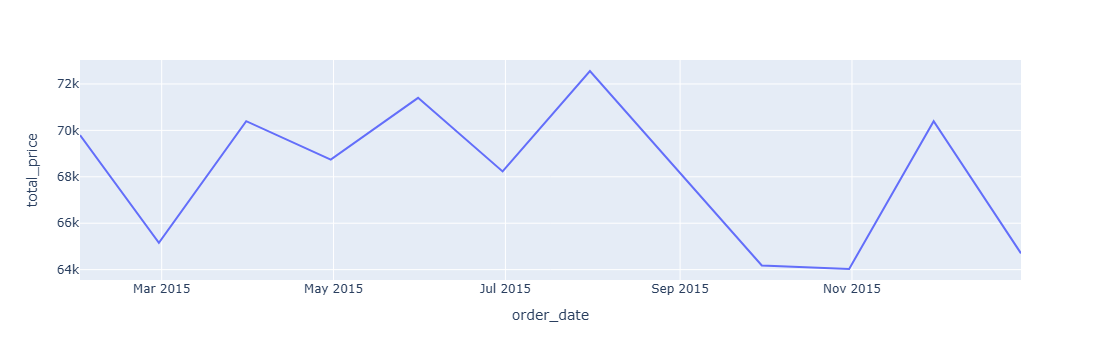

In [33]:
fig_por_mes = px.line(vendas_por_mes, y="total_price",x="order_date")
fig_por_mes.show()

**Patrones Sazonales Identificados:***

**Alta Temporada (Septiembre a Marzo):** Se observa un aumento en las ventas y los ingresos durante estos meses, lo que sugiere una mayor demanda. Esto puede estar relacionado con factores como un clima más cálido, las vacaciones escolares y eventos locales que fomentan salir de casa.

**Baja Temporada (Abril a Agosto):** En estos meses, hay una reducción en las ventas y los ingresos, lo que indica menor movimiento. Las temperaturas más bajas y la ausencia de feriados largos pueden contribuir a esta disminución.

**Meses Destacados:**

**Julio:** Registró el mayor volumen de ventas (4.392 unidades) y el mayor ingreso (CLP 72.557,90). Este pico puede estar asociado con las vacaciones escolares y eventos locales que aumentan la actividad en la ciudad.

**Octubre:** Presentó el menor volumen de ventas (3.883 unidades) y el menor ingreso (CLP 64.027,60). La ausencia de feriados largos y el clima más suave pueden haber contribuido a esta caída.

In [35]:
vendas_semanal = vendas_ano.resample('W', on='order_date').sum()
display(vendas_semanal)

quantity  unit_price  total_price
order_date                                   
2015-01-04       591     9692.60      9863.60
2015-01-11       972    15668.15     15999.05
2015-01-18       917    14777.35     15115.95
2015-01-25       968    15372.95     15652.80
2015-02-01       975    16116.35     16351.10
2015-02-08       988    15937.60     16175.70
2015-02-15       976    15832.55     16085.55
2015-02-22       933    15026.70     15345.90
2015-03-01       972    15714.40     15961.80
2015-03-08       996    16162.30     16564.45
2015-03-15       965    15496.85     15820.55
2015-03-22       949    15503.75     15712.25
2015-03-29       954    15518.00     15689.25
2015-04-05      1025    16543.20     16951.65
2015-04-12       968    15834.75     16160.85
2015-04-19       967    15808.80     16088.50
2015-04-26       975    15749.65     16128.00
2015-05-03       934    14972.50     15224.25
2015-05-10       985    15885.10     16250.20
2015-05-17      1046    16821.20     17139.70
2015-05-24       953    15476.80     15908.40
2015-05-31       924    15052.10     15300.05
2015-06-07       997    16405.95     16650.20
2015-06-14       962    15358.40     15883.90
2015-06-21       920    15152.55     15394.75
2015-06-28       980    15862.10     16216.80
2015-07-05      1066    17200.00     17509.50
2015-07-12       950    15575.45     15888.70
2015-07-19       981    15950.30     16258.25
2015-07-26       985    15882.15     16351.65
2015-08-02       926    14651.80     14985.05
2015-08-09       955    15347.50     15611.95
2015-08-16       994    16070.35     16277.60
2015-08-23       959    15342.35     15676.85
2015-08-30       866    14027.05     14279.80
2015-09-06       945    15315.35     15542.75
2015-09-13      1009    16477.75     16717.00
2015-09-20       974    15613.15     15979.85
2015-09-27       674    10777.70     11026.40
2015-10-04      1008    16463.65     16815.55
2015-10-11       794    12685.10     13023.20
2015-10-18       933    15092.05     15482.70
2015-10-25       876    14194.25     14425.75
2015-11-01       810    13002.50     13262.45
2015-11-08       970    15951.60     16122.70
2015-11-15       944    15095.80     15448.30
2015-11-22       908    14550.05     14860.55
2015-11-29      1186    19291.65     19753.90
2015-12-06      1013    16336.90     16613.80
2015-12-13       959    15379.00     15667.50
2015-12-20       962    15768.10     15971.00
2015-12-27       693    11206.40     11427.85
2016-01-03       442     6954.10      7244.25

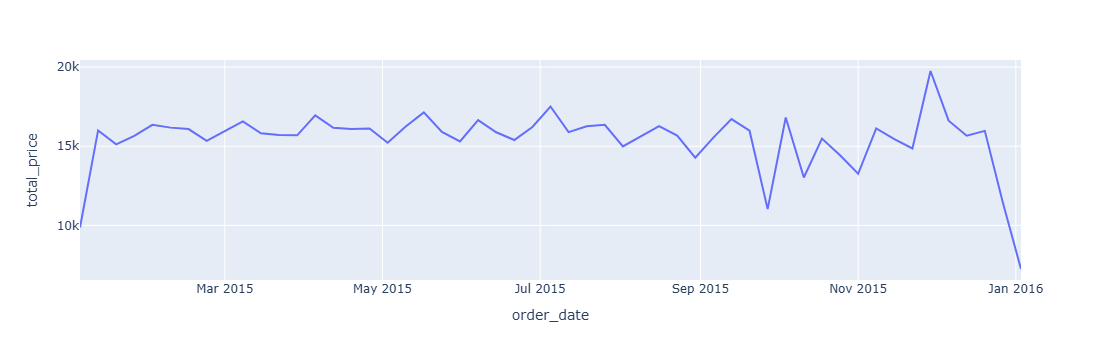

In [36]:
fig_por_semana = px.line(vendas_semanal, y="total_price")
fig_por_semana.show()

**1. Mayores Picos de Ventas**

**Semana con mayor venta:**

**29 de noviembre de 2015:** 19,753.90.

**Otros picos significativos:**

**5 de julio de 2015:** 17,509.50.

**17 de mayo de 2015:** 17,139.70.

**13 de septiembre de 2015:** 16,717.00.

Estas semanas reflejan las ventas más altas de la pizzería, generalmente coincidiendo con períodos de mayor movimiento.

**2. Semanas con Menores Ventas**

**Semana con menor venta:**

**3 de enero de 2016:** 7,244.25.

**Otras semanas con caída en las ventas:**

**27 de diciembre de 2015:** 11,427.85.

**20 de diciembre de 2015:** 15,971.00.

## Ventas Por Categoria

In [39]:
vendas_por_categoria = df.groupby(["order_date","pizza_name","pizza_category","pizza_size","pizza_ingredients","unit_price"]).sum(numeric_only=True).reset_index()
display(vendas_por_categoria)


order_date                         pizza_name pizza_category pizza_size  \
0     2015-01-01         The Barbecue Chicken Pizza        Chicken          L   
1     2015-01-01         The Barbecue Chicken Pizza        Chicken          M   
2     2015-01-01         The Barbecue Chicken Pizza        Chicken          S   
3     2015-01-01                 The Big Meat Pizza        Classic          S   
4     2015-01-01                The Calabrese Pizza        Supreme          M   
...          ...                                ...            ...        ...   
22959 2015-12-31             The Thai Chicken Pizza        Chicken          L   
22960 2015-12-31             The Thai Chicken Pizza        Chicken          M   
22961 2015-12-31  The Vegetables + Vegetables Pizza         Veggie          L   
22962 2015-12-31  The Vegetables + Vegetables Pizza         Veggie          M   
22963 2015-12-31  The Vegetables + Vegetables Pizza         Veggie          S   

                                       pizza_ingredients  unit_price  \
0      Barbecued Chicken, Red Peppers, Green Peppers,...       20.75   
1      Barbecued Chicken, Red Peppers, Green Peppers,...       16.75   
2      Barbecued Chicken, Red Peppers, Green Peppers,...       12.75   
3      Bacon, Pepperoni, Italian Sausage, Chorizo Sau...       12.00   
4      慛duja Salami, Pancetta, Tomatoes, Red Onions, ...       16.25   
...                                                  ...         ...   
22959  Chicken, Pineapple, Tomatoes, Red Peppers, Tha...       20.75   
22960  Chicken, Pineapple, Tomatoes, Red Peppers, Tha...       16.75   
22961  Mushrooms, Tomatoes, Red Peppers, Green Pepper...       20.25   
22962  Mushrooms, Tomatoes, Red Peppers, Green Pepper...       16.00   
22963  Mushrooms, Tomatoes, Red Peppers, Green Pepper...       12.00   

       quantity  total_price  
0             6       124.50  
1             4        67.00  
2             1        12.75  
3             5        60.00  
4             1        16.25  
...         ...          ...  
22959         1        20.75  
22960         2        33.50  
22961         4        81.00  
22962         2        32.00  
22963         4        48.00  

[22964 rows x 8 columns]

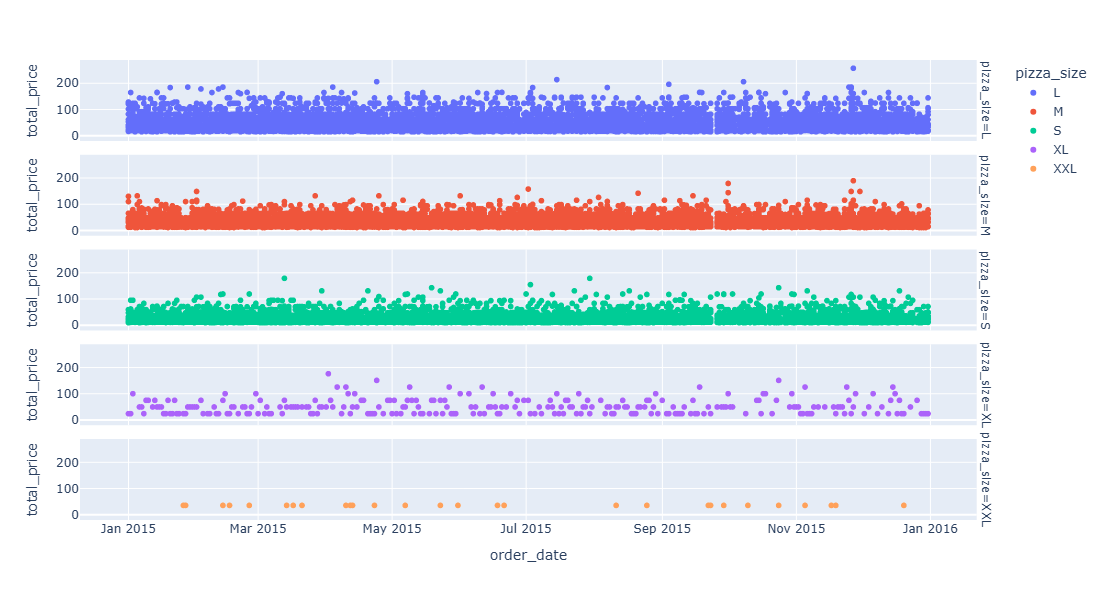

In [40]:
fig4 = px.scatter(vendas_por_categoria, x="order_date", y="total_price",color="pizza_size",facet_row="pizza_size",height=600)
fig4.show()

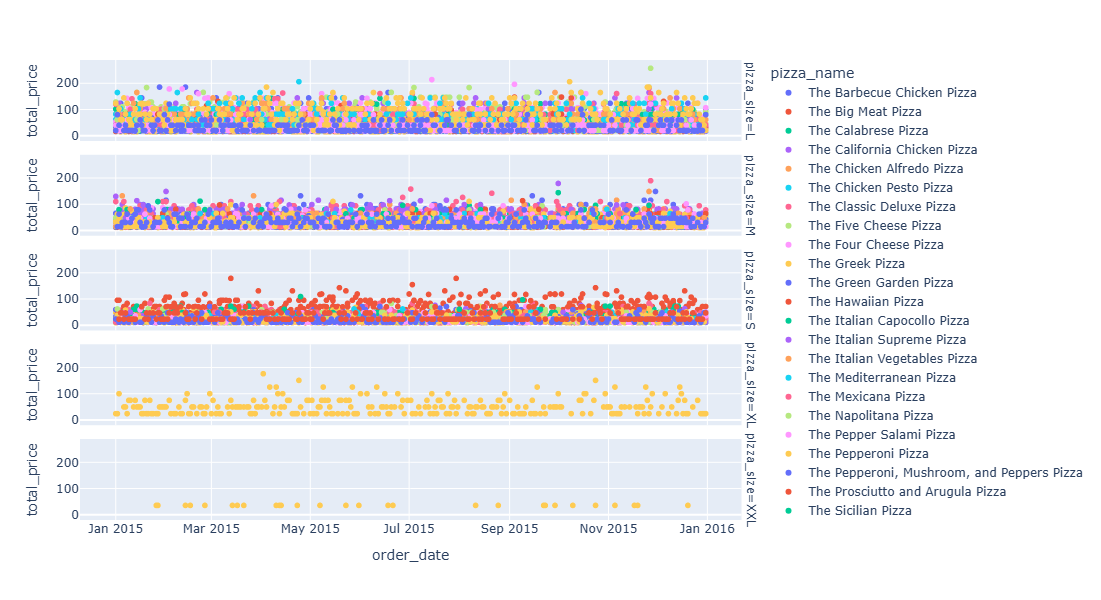

In [41]:
fig5 = px.scatter(vendas_por_categoria, x="order_date", y="total_price",color="pizza_name",facet_row="pizza_size",height=600)
fig5.show()

## Analisando Outliers

In [43]:
fig2 = px.box(vendas_ano, y="total_price",points="all")
fig2.show()

## Análisis de Correlación

In [45]:
df_variaves = df.groupby(["unit_price"]).sum(numeric_only=True).reset_index()
df_transformado = pd.get_dummies(df_variaves,dtype=float)
display(df_transformado)
df_correlacao = df_transformado.corr()
df_correlacao

unit_price  quantity  total_price
0         9.75       751      7322.25
1        10.50      1020     10710.00
2        11.00       578      6358.00
3        12.00      5744     68928.00
4        12.25       850     10412.50
5        12.50      3380     42250.00
6        12.75      2529     32244.75
7        13.25       483      6399.75
8        14.50       397      5756.50
9        14.75       586      8643.50
10       15.25       728     11102.00
11       16.00      4522     72352.00
12       16.25      1136     18460.00
13       16.50      4111     67831.50
14       16.75      4380     73365.00
15       17.50       384      6720.00
16       17.95      1316     23622.20
17       18.50      1409     26066.50
18       20.25      3093     62633.25
19       20.50      2026     41533.00
20       20.75      8891    184488.25
21       21.00       190      3990.00
22       23.65       490     11588.50
23       25.50       552     14076.00
24       35.95        28      1006.60

unit_price  quantity  total_price
unit_price     1.000000 -0.088219     0.040577
quantity      -0.088219  1.000000     0.966924
total_price    0.040577  0.966924     1.000000

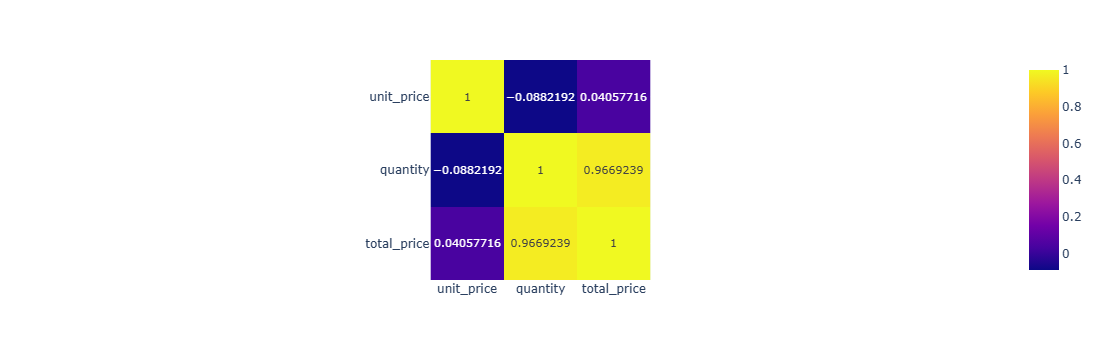

In [46]:
figco = px.imshow(df_correlacao, text_auto=True)
figco.show()

Lo que tienes aquí es una matriz de correlación entre tres variables: **unit_price (precio unitario)**, **quantity (cantidad)** y **total_price (precio total)**. La matriz de correlación muestra la fuerza y la dirección de la relación lineal entre estas variables.

Vamos a interpretar cada valor de esta matriz de correlación:

**unit_price vs. quantity:** El valor de -0.088219 sugiere una correlación muy débil y negativa. Esto indica que, en general, no hay una relación lineal significativa entre el precio unitario y la cantidad. Cuando el precio unitario aumenta, la cantidad vendida no parece verse afectada de manera lineal, o la relación es muy pequeña.

**unit_price vs. total_price:** El valor de 0.040577 sugiere una correlación muy débil y positiva. Esto indica que el precio unitario tiene una relación muy débil con el precio total, lo cual es esperado, ya que el precio total depende tanto del precio unitario como de la cantidad. Dado que la correlación es positiva, esto sugiere que, en cierta medida, un aumento en el precio unitario puede llevar a un aumento en el precio total, pero la relación no es fuerte.

**quantity vs. total_price:** El valor de 0.966924 indica una fuerte correlación positiva. Esto significa que la cantidad vendida tiene una relación muy fuerte con el precio total, lo cual tiene sentido, ya que el precio total es simplemente el producto del precio unitario y la cantidad. Cuando la cantidad vendida aumenta, el precio total también tiende a aumentar de manera proporcional.

**Resumen e Implicaciones:**

**Precio unitario y cantidad:** La relación débil entre estas dos variables sugiere que el volumen de ventas no es muy sensible al precio unitario. Esto puede indicar que la pizzería tiene una base de clientes que no modifica mucho su compra en función del precio, o que el precio está en un punto donde no hay mucha variación en las ventas debido al precio.

**Precio unitario y precio total:** Aunque la correlación es débil, sugiere que, a medida que el precio unitario aumenta, el precio total tiende a aumentar un poco. Sin embargo, como la relación no es fuerte, otros factores, como la cantidad, tienen un impacto más significativo en el precio total.

**Cantidad y precio total:** La fuerte correlación positiva entre estas dos variables confirma que, en gran medida, el precio total está determinado por la cantidad de productos vendidos. Esto es esperado, ya que el precio total es el producto del precio unitario por la cantidad.

Con base en estas correlaciones, la pizzería puede considerar optimizar la estrategia de ventas enfocándose más en la cantidad de pizzas vendidas (por ejemplo, promociones para aumentar las ventas) y analizar la sensibilidad de los clientes al precio unitario, para entender si vale la pena ajustar los precios o ofrecer más opciones.

In [48]:
df_variavesj = df.groupby(["unit_price","pizza_category","pizza_size"]).sum(numeric_only=True).reset_index()
df_transformadoj = pd.get_dummies(df_variavesj,dtype=float)
display(df_transformadoj)
df_correlacaoj = df_transformadoj.corr()
df_correlacaoj

unit_price  quantity  total_price  pizza_category_Chicken  \
0         9.75       751      7322.25                     0.0   
1        10.50      1020     10710.00                     0.0   
2        11.00       578      6358.00                     0.0   
3        12.00      3790     45480.00                     0.0   
4        12.00      1954     23448.00                     0.0   
5        12.25       850     10412.50                     0.0   
6        12.50       939     11737.50                     0.0   
7        12.50      2037     25462.50                     0.0   
8        12.50       404      5050.00                     0.0   
9        12.75      2224     28356.00                     1.0   
10       12.75       305      3888.75                     0.0   
11       13.25       483      6399.75                     0.0   
12       14.50       397      5756.50                     0.0   
13       14.75       586      8643.50                     0.0   
14       15.25       728     11102.00                     0.0   
15       16.00      2293     36688.00                     0.0   
16       16.00      2229     35664.00                     0.0   
17       16.25      1136     18460.00                     0.0   
18       16.50       919     15163.50                     0.0   
19       16.50      2910     48015.00                     0.0   
20       16.50       282      4653.00                     0.0   
21       16.75      3894     65224.50                     1.0   
22       16.75       486      8140.50                     0.0   
23       17.50       384      6720.00                     0.0   
24       17.95      1316     23622.20                     0.0   
25       18.50      1409     26066.50                     0.0   
26       20.25       889     18002.25                     0.0   
27       20.25      2204     44631.00                     0.0   
28       20.50      2026     41533.00                     0.0   
29       20.75      4932    102339.00                     1.0   
30       20.75      3675     76256.25                     0.0   
31       20.75       284      5893.00                     0.0   
32       21.00       190      3990.00                     0.0   
33       23.65       490     11588.50                     0.0   
34       25.50       552     14076.00                     0.0   
35       35.95        28      1006.60                     0.0   

    pizza_category_Classic  pizza_category_Supreme  pizza_category_Veggie  \
0                      1.0                     0.0                    0.0   
1                      1.0                     0.0                    0.0   
2                      1.0                     0.0                    0.0   
3                      1.0                     0.0                    0.0   
4                      0.0                     0.0                    1.0   
5                      0.0                     1.0                    0.0   
6                      1.0                     0.0                    0.0   
7                      0.0                     1.0                    0.0   
8                      0.0                     0.0                    1.0   
9                      0.0                     0.0                    0.0   
10                     0.0                     0.0                    1.0   
11                     1.0                     0.0                    0.0   
12                     1.0                     0.0                    0.0   
13                     0.0                     0.0                    1.0   
14                     1.0                     0.0                    0.0   
15                     1.0                     0.0                    0.0   
16                     0.0                     0.0                    1.0   
17                     0.0                     1.0                    0.0   
18                     1.0                     0.0                    0.0   
19                     0.0                     1.0        

unit_price  quantity  total_price  \
unit_price                1.000000 -0.056253     0.111152   
quantity                 -0.056253  1.000000     0.960413   
total_price               0.111152  0.960413     1.000000   
pizza_category_Chicken    0.000335  0.575858     0.572827   
pizza_category_Classic   -0.042411 -0.207189    -0.249114   
pizza_category_Supreme    0.069316  0.136452     0.153947   
pizza_category_Veggie    -0.014532 -0.237924    -0.207479   
pizza_size_L              0.341905  0.118645     0.269960   
pizza_size_M             -0.174109  0.024339    -0.001397   
pizza_size_S             -0.512949 -0.037185    -0.193215   
pizza_size_XL             0.295940 -0.115491    -0.065167   
pizza_size_XXL            0.649153 -0.188841    -0.163716   

                        pizza_category_Chicken  pizza_category_Classic  \
unit_price                        3.349542e-04               -0.042411   
quantity                          5.758584e-01               -0.207189   
total_price                       5.728274e-01               -0.249114   
pizza_category_Chicken            1.000000e+00               -0.240523   
pizza_category_Classic           -2.405228e-01                1.000000   
pizza_category_Supreme           -1.481336e-01               -0.391925   
pizza_category_Veggie            -2.132007e-01               -0.564076   
pizza_size_L                     -8.136574e-18               -0.080582   
pizza_size_M                      1.818182e-02               -0.034360   
pizza_size_S                      1.818182e-02               -0.034360   
pizza_size_XL                    -5.096472e-02                0.211891   
pizza_size_XXL                   -5.096472e-02                0.211891   

                        pizza_category_Supreme  pizza_category_Veggie  \
unit_price                            0.069316              -0.014532   
quantity                              0.136452              -0.237924   
total_price                           0.153947              -0.207479   
pizza_category_Chicken               -0.148134              -0.213201   
pizza_category_Classic               -0.391925              -0.564076   
pizza_category_Supreme                1.000000              -0.347404   
pizza_category_Veggie                -0.347404               1.000000   
pizza_size_L                         -0.049629               0.125000   
pizza_size_M                         -0.021162               0.042640   
pizza_size_S                          0.131204              -0.085280   
pizza_size_XL                        -0.083045              -0.119523   
pizza_size_XXL                       -0.083045              -0.119523   

                        pizza_size_L  pizza_size_M  pizza_size_S  \
unit_price              3.419051e-01     -0.174109     -0.512949   
quantity                1.186448e-01      0.024339     -0.037185   
total_price             2.699602e-01     -0.001397     -0.193215   
pizza_category_Chicken -8.136574e-18      0.018182      0.018182   
pizza_category_Classic -8.058230e-02     -0.034360     -0.034360   
pizza_category_Supreme -4.962917e-02     -0.021162      0.131204   
pizza_category_Veggie   1.250000e-01      0.042640     -0.085280   
pizza_size_L            1.000000e+00     -0.469042     -0.469042   
pizza_size_M           -4.690416e-01      1.000000     -0.440000   
pizza_size_S           -4.690416e-01     -0.440000      1.000000   
pizza_size_XL          -1.195229e-01     -0.112122     -0.112122   
pizza_size_XXL         -1.195229e-01     -0.112122     -0.112122   

                        pizza_size_XL  pizza_size_XXL  
unit_price                   0.295940        0.649153  
quantity                    -0.115491       -0.188841  
total_price                 -0.065167       -0.163716  
pizza_category_Chicken      -0.050965       -0.050965  
pizza_category_Classic       0.211891        0.211891  
pizza_category_Supreme      -0.083045       -0.083045  
pizza_category_Veggie       -0.119523   

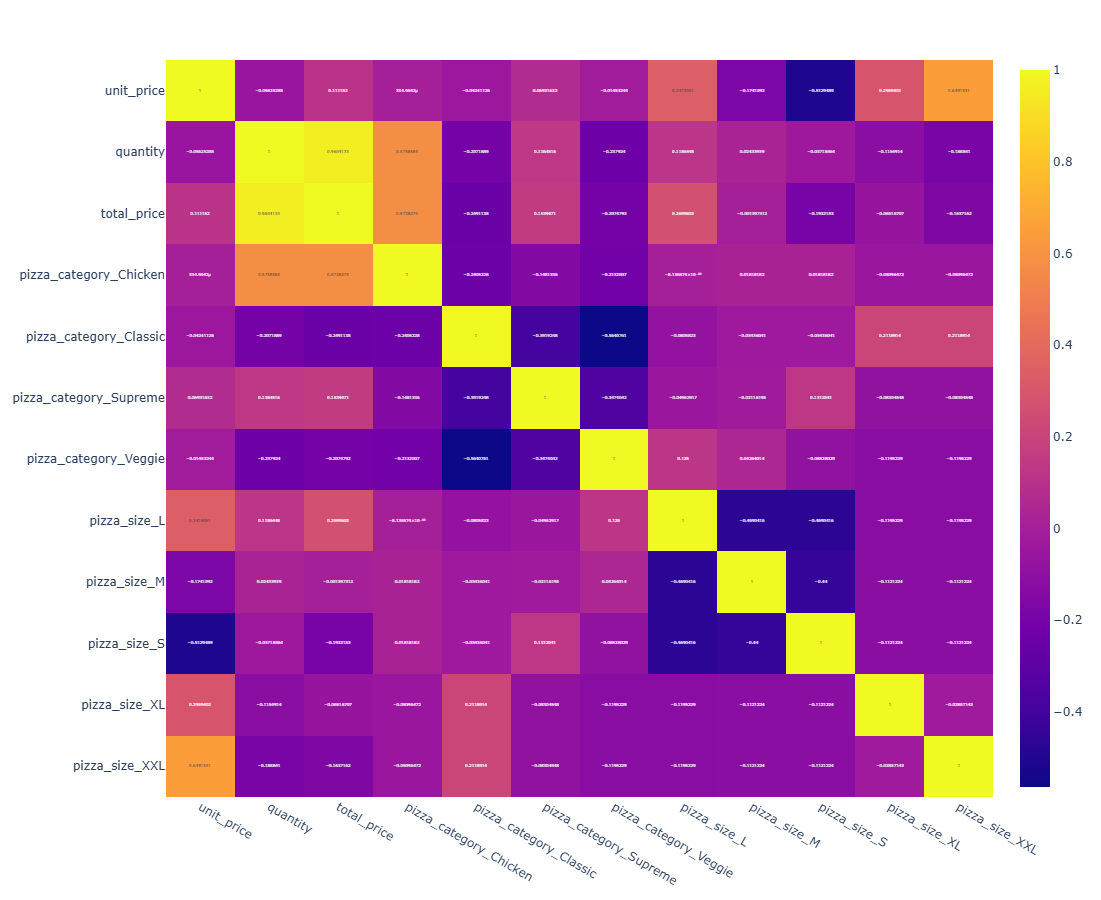

In [49]:
figcoj = px.imshow(df_correlacaoj, text_auto=True,aspect="auto",height=900,width=1000)
figcoj.show()

In [50]:
df_variaves2 = df.groupby(["unit_price","pizza_category"]).sum(numeric_only=True).reset_index()
df_transformado2 = pd.get_dummies(df_variaves2,dtype=float)
display(df_transformado2)
df_correlacao2 = df_transformado2.corr()
df_correlacao2

unit_price  quantity  total_price  pizza_category_Chicken  \
0         9.75       751      7322.25                     0.0   
1        10.50      1020     10710.00                     0.0   
2        11.00       578      6358.00                     0.0   
3        12.00      3790     45480.00                     0.0   
4        12.00      1954     23448.00                     0.0   
5        12.25       850     10412.50                     0.0   
6        12.50       939     11737.50                     0.0   
7        12.50      2037     25462.50                     0.0   
8        12.50       404      5050.00                     0.0   
9        12.75      2224     28356.00                     1.0   
10       12.75       305      3888.75                     0.0   
11       13.25       483      6399.75                     0.0   
12       14.50       397      5756.50                     0.0   
13       14.75       586      8643.50                     0.0   
14       15.25       728     11102.00                     0.0   
15       16.00      2293     36688.00                     0.0   
16       16.00      2229     35664.00                     0.0   
17       16.25      1136     18460.00                     0.0   
18       16.50       919     15163.50                     0.0   
19       16.50      2910     48015.00                     0.0   
20       16.50       282      4653.00                     0.0   
21       16.75      3894     65224.50                     1.0   
22       16.75       486      8140.50                     0.0   
23       17.50       384      6720.00                     0.0   
24       17.95      1316     23622.20                     0.0   
25       18.50      1409     26066.50                     0.0   
26       20.25       889     18002.25                     0.0   
27       20.25      2204     44631.00                     0.0   
28       20.50      2026     41533.00                     0.0   
29       20.75      4932    102339.00                     1.0   
30       20.75      3675     76256.25                     0.0   
31       20.75       284      5893.00                     0.0   
32       21.00       190      3990.00                     0.0   
33       23.65       490     11588.50                     0.0   
34       25.50       552     14076.00                     0.0   
35       35.95        28      1006.60                     0.0   

    pizza_category_Classic  pizza_category_Supreme  pizza_category_Veggie  
0                      1.0                     0.0                    0.0  
1                      1.0                     0.0                    0.0  
2                      1.0                     0.0                    0.0  
3                      1.0                     0.0                    0.0  
4                      0.0                     0.0                    1.0  
5                      0.0                     1.0                    0.0  
6                      1.0                     0.0                    0.0  
7                      0.0                     1.0                    0.0  
8                      0.0                     0.0                    1.0  
9                      0.0                     0.0                    0.0  
10                     0.0                     0.0                    1.0  
11                     1.0                     0.0                    0.0  
12                     1.0                     0.0                    0.0  
13                     0.0                     0.0                    1.0  
14                     1.0                     0.0                    0.0  
15                     1.0                     0.0                    0.0  
16                     0.0                     0.0                    1.0  
17                     0.0                     1.0                    0.0  
18                     1.0                     0.0                    0.0  
19                     0.0                     1.0                    0.0  
20

unit_price  quantity  total_price  \
unit_price                1.000000 -0.056253     0.111152   
quantity                 -0.056253  1.000000     0.960413   
total_price               0.111152  0.960413     1.000000   
pizza_category_Chicken    0.000335  0.575858     0.572827   
pizza_category_Classic   -0.042411 -0.207189    -0.249114   
pizza_category_Supreme    0.069316  0.136452     0.153947   
pizza_category_Veggie    -0.014532 -0.237924    -0.207479   

                        pizza_category_Chicken  pizza_category_Classic  \
unit_price                            0.000335               -0.042411   
quantity                              0.575858               -0.207189   
total_price                           0.572827               -0.249114   
pizza_category_Chicken                1.000000               -0.240523   
pizza_category_Classic               -0.240523                1.000000   
pizza_category_Supreme               -0.148134               -0.391925   
pizza_category_Veggie                -0.213201               -0.564076   

                        pizza_category_Supreme  pizza_category_Veggie  
unit_price                            0.069316              -0.014532  
quantity                              0.136452              -0.237924  
total_price                           0.153947              -0.207479  
pizza_category_Chicken               -0.148134              -0.213201  
pizza_category_Classic               -0.391925              -0.564076  
pizza_category_Supreme                1.000000              -0.347404  
pizza_category_Veggie                -0.347404               1.000000

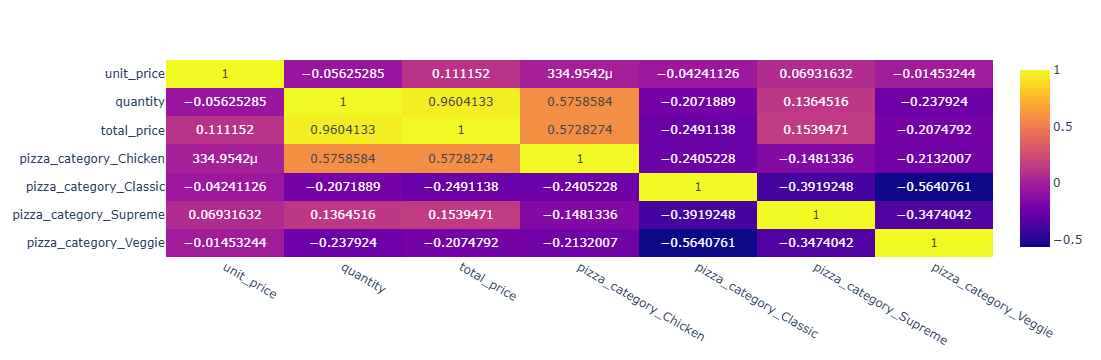

In [51]:
figco2 = px.imshow(df_correlacao2, text_auto=True,aspect="auto",width=800)
figco2.show()

In [52]:
df_variaves3 = df.groupby(["unit_price","pizza_size"]).sum(numeric_only=True).reset_index()
df_transformado3 = pd.get_dummies(df_variaves3,dtype=float)
display(df_transformado3)
df_correlacao3 = df_transformado3.corr()
df_correlacao3

unit_price  quantity  total_price  pizza_size_L  pizza_size_M  \
0         9.75       751      7322.25           0.0           0.0   
1        10.50      1020     10710.00           0.0           0.0   
2        11.00       578      6358.00           0.0           0.0   
3        12.00      5744     68928.00           0.0           0.0   
4        12.25       850     10412.50           0.0           0.0   
5        12.50       939     11737.50           0.0           1.0   
6        12.50      2441     30512.50           0.0           0.0   
7        12.75      2529     32244.75           0.0           0.0   
8        13.25       483      6399.75           0.0           1.0   
9        14.50       397      5756.50           0.0           1.0   
10       14.75       586      8643.50           0.0           1.0   
11       15.25       728     11102.00           1.0           0.0   
12       16.00      4522     72352.00           0.0           1.0   
13       16.25      1136     18460.00           0.0           1.0   
14       16.50       919     15163.50           1.0           0.0   
15       16.50      3192     52668.00           0.0           1.0   
16       16.75      4380     73365.00           0.0           1.0   
17       17.50       384      6720.00           1.0           0.0   
18       17.95      1316     23622.20           1.0           0.0   
19       18.50      1409     26066.50           1.0           0.0   
20       20.25      3093     62633.25           1.0           0.0   
21       20.50      2026     41533.00           1.0           0.0   
22       20.75      8891    184488.25           1.0           0.0   
23       21.00       190      3990.00           1.0           0.0   
24       23.65       490     11588.50           0.0           0.0   
25       25.50       552     14076.00           0.0           0.0   
26       35.95        28      1006.60           0.0           0.0   

    pizza_size_S  pizza_size_XL  pizza_size_XXL  
0            1.0            0.0             0.0  
1            1.0            0.0             0.0  
2            1.0            0.0             0.0  
3            1.0            0.0             0.0  
4            1.0            0.0             0.0  
5            0.0            0.0             0.0  
6            1.0            0.0             0.0  
7            1.0            0.0             0.0  
8            0.0            0.0             0.0  
9            0.0            0.0             0.0  
10           0.0            0.0             0.0  
11           0.0            0.0             0.0  
12           0.0            0.0             0.0  
13           0.0            0.0             0.0  
14           0.0            0.0             0.0  
15           0.0            0.0             0.0  
16           0.0            0.0             0.0  
17           0.0            0.0             0.0  
18           0.0            0.0             0.0  
19           0.0            0.0             0.0  
20           0.0            0.0             0.0  
21           0.0            0.0             0.0  
22           0.0            0.0             0.0  
23           0.0            0.0             0.0  
24           1.0            0.0             0.0  
25           0.0            1.0             0.0  
26           0.0            0.0             1.0

unit_price  quantity  total_price  pizza_size_L  pizza_size_M  \
unit_price        1.000000 -0.056889     0.067999      0.241011     -0.211501   
quantity         -0.056889  1.000000     0.968491      0.095398      0.038336   
total_price       0.067999  0.968491     1.000000      0.215213      0.015259   
pizza_size_L      0.241011  0.095398     0.215213      1.000000     -0.458831   
pizza_size_M     -0.211501  0.038336     0.015259     -0.458831      1.000000   
pizza_size_S     -0.451614 -0.011569    -0.139004     -0.458831     -0.421053   
pizza_size_XL     0.312453 -0.125764    -0.084819     -0.138675     -0.127257   
pizza_size_XXL    0.689280 -0.177085    -0.153184     -0.138675     -0.127257   

                pizza_size_S  pizza_size_XL  pizza_size_XXL  
unit_price         -0.451614       0.312453        0.689280  
quantity           -0.011569      -0.125764       -0.177085  
total_price        -0.139004      -0.084819       -0.153184  
pizza_size_L       -0.458831      -0.138675       -0.138675  
pizza_size_M       -0.421053      -0.127257       -0.127257  
pizza_size_S        1.000000      -0.127257       -0.127257  
pizza_size_XL      -0.127257       1.000000       -0.038462  
pizza_size_XXL     -0.127257      -0.038462        1.000000

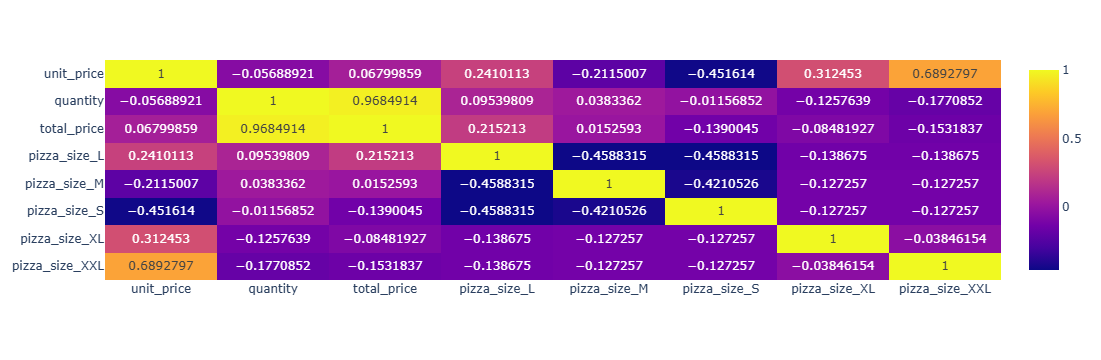

In [53]:
figco3 = px.imshow(df_correlacao3, text_auto=True,aspect="auto")
figco3.show()

**Correlación con Categorías de Pizza**

Las variables que representan las categorías de pizza (pizza_category_Chicken, pizza_category_Classic, pizza_category_Supreme, pizza_category_Veggie) muestran cómo cada categoría influye en variables clave como quantity, total_price y unit_price. Analicemos cada una:


**1. pizza_category_Chicken:**


**Correlación con quantity (0.576) y total_price (0.573):**

La relación moderada positiva indica que las pizzas de esta categoría son populares y contribuyen significativamente al volumen de ventas y los ingresos.

**Correlación cercana a cero con unit_price (0.0003):**

El precio unitario de estas pizzas parece ser consistente y poco variable.

**Relaciones negativas con otras categorías:**

Las correlaciones negativas con pizza_category_Classic (-0.240), Supreme (-0.148) y Veggie (-0.213) sugieren que los pedidos de estas categorías pueden ser excluyentes (los clientes tienden a elegir una u otra).

**2. pizza_category_Classic:**

**Correlación negativa con quantity (-0.207) y total_price (-0.249):**

Sugiere que esta categoría tiene menor volumen de ventas y contribuye menos a los ingresos.

**Correlación moderada negativa con pizza_category_Veggie (-0.564):**

Puede indicar que estas dos categorías compiten directamente, siendo menos elegidas juntas.

**Correlación positiva con pizza_size_XL y XXL (0.211):**

Las pizzas Classic pueden ser más populares en tamaños grandes.

**3. pizza_category_Supreme:**

**Correlación débil positiva con quantity (0.136) y total_price (0.153):**

Las pizzas Supreme tienen ventas moderadas, pero su contribución a los ingresos es limitada.

**Correlación positiva con pizza_size_S (0.131):**

Esta categoría puede ser más popular en tamaños pequeños.

**4. pizza_category_Veggie:**

**Correlación negativa con quantity (-0.238) y total_price (-0.207):**

Aparentemente, es una de las categorías menos populares.

**Correlación negativa con casi todas las variables de tamaño y categorías:**

Puede sugerir que esta categoría es de nicho, posiblemente elegida por un público específico.
Análisis Detallado: Correlación con Tamaños de Pizza
Las variables que representan los tamaños (pizza_size_L, pizza_size_M, pizza_size_S, pizza_size_XL, pizza_size_XXL) ayudan a entender las preferencias de los clientes y su relación con los precios y las ventas.

**1. pizza_size_L (Large):**

**Correlación positiva con unit_price (0.342) y total_price (0.270):**

Este tamaño es bien aceptado y contribuye de manera significativa a los ingresos.

**Correlación negativa con pizza_size_S y pizza_size_M (-0.469):**

Hay una sustitución entre tamaños grandes y pequeños/medianos.

**Correlación con pizza_category_Veggie (0.125):**

Ligera preferencia por pizzas Veggie en este tamaño.

**2. pizza_size_M (Medium):**

**Correlación baja o neutra con otras variables:**

Este tamaño parece no destacarse en ventas o ingresos.

**Correlación negativa con otros tamaños (-0.440 con pizza_size_L, por ejemplo):**

Sugiere que hay sustitución directa entre los tamaños mediano y grande.

**3. pizza_size_S (Small):**

**Correlación negativa con unit_price (-0.513) y total_price (-0.193):**

Los tamaños pequeños tienen precios bajos y contribuyen menos a los ingresos.

**Correlación positiva con pizza_category_Supreme (0.131):**

Las pizzas Supreme parecen más populares en este tamaño.

**4. pizza_size_XL (Extra Large):**

**Correlación positiva con unit_price (0.296):**

Los tamaños más grandes tienen precios unitarios más altos.

**Correlación positiva con pizza_category_Classic (0.211):**

Esta categoría parece preferida en este tamaño.

**5. pizza_size_XXL (Extra Extra Large):**

**Correlación muy alta con unit_price (0.649):**

Este tamaño tiene el precio más alto por unidad, contribuyendo de forma relevante a los ingresos.

**Correlación negativa con quantity (-0.189):**

Indica menor volumen de ventas, posiblemente por ser un tamaño premium.

**Conclusiones:**

**Categorías de pizza:**

Las pizzas Chicken lideran las ventas, mientras que Classic y Veggie tienen menor impacto en los ingresos.
Las elecciones de categoría pueden variar según los tamaños preferidos por los clientes.
Tamaños de pizza:

Los tamaños grandes (L, XL, XXL) generan mayores ingresos, pero los tamaños pequeños son importantes para categorías específicas como Supreme.
Introducir promociones en tamaños medianos podría atraer clientes que optan por L o S.